In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv("rankingcard.csv", index_col=0)
print(data.shape)

(150000, 11)


In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 探索数据以及数据预处理
缺失值，量纲是否统一，是否需要做哑变量

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

# 去除重复值

In [6]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [7]:
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

# 填补缺失值
- 空值比例
  - 2% 的可以直接删，或者用均值填补
  - 缺失 20% 的需要填补

In [9]:
data.isnull().sum() / data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

# 使用均值填补家属人数(缺2%)

In [10]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()), inplace=True)
data["NumberOfDependents"]

0         2.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
149386    0.0
149387    2.0
149388    0.0
149389    0.0
149390    0.0
Name: NumberOfDependents, Length: 149391, dtype: float64

In [11]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

# 用随机森林填充收入(缺20%)

In [12]:
from sklearn.ensemble import RandomForestRegressor as RFR

def fill_missing_rf(X, y, to_fill):
    """
    随机森林填补一个特征的缺失值
    X: 要填补的特征矩阵
    y: 完整的没有缺失值的标签
    to_fill: 要填补的列名
    """
    
    df = X.copy()
    fill = df.loc[:, to_fill]
    df = pd.concat([df.loc[:, df.columns != to_fill], pd.DataFrame(y)], axis=1)
    
    # 分训练集测试集
    YTrain = fill[fill.notnull()] # 要填的那一列非空的部分
    YTest = fill[fill.isnull()] 
    XTrain = df.iloc[YTrain.index, :]
    XTest = df.iloc[YTest.index, :]
    
    rfr = RFR(n_estimators=100)
    rfr = rfr.fit(XTrain, YTrain)
    Ypredict = rfr.predict(XTest)
    
    return Ypredict

In [14]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X.shape

(149391, 10)

In [15]:
y_pred = fill_missing_rf(X, y, "MonthlyIncome")

In [16]:
# 确认结果合理后，将数据覆盖
data.loc[data.loc[:, "MonthlyIncome"].isnull(), "MonthlyIncome"] = y_pred

# 异常值

- 箱线图
- 3sigma 法则

In [16]:
# 描述性统计
# 参数为分位数
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.493910e+05,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,5.425385e+03,8.480892,0.238120,1.022391,0.212503,0.740393
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.324809e+04,5.136515,3.826165,1.130196,3.810523,1.108272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.003199,33.000000,0.000000,0.034991,1.700000e-01,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,1.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,4.420000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,7.416000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
90%,0.000000,0.978007,72.000000,1.000000,1275.000000,1.080000e+04,15.000000,0.000000,2.000000,0.000000,2.000000


In [17]:
# 异常值也被我们观察到,年龄的最小值居然有0,这不符合银行的业务需求,即便是儿童账户也要至少8岁,我们可以查看一下年龄为0的人有多少
(data["age"] == 0).sum()
data["NumberOfDependents"]

0         2.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
149386    0.0
149387    2.0
149388    0.0
149389    0.0
149390    0.0
Name: NumberOfDependents, Length: 149391, dtype: float64

In [18]:
# 发现只有一个人年龄为0,可以判断这肯定是录入失误造成的,可以当成是缺失值来处理,直接删除掉这个样本
data = data[data["age"] != 0]

另外,有三个指标看起来很奇怪:

- "NumberOfTime30-59DaysPastDueNotWorse"
- "NumberOfTime60-89DaysPastDueNotWorse"
- "NumberOfTimes90DaysLate"

这三个指标分别是

- “过去两年内出现35-59天逾期但是没有发展的更坏的次数”
- “过去两年内出现60-89天逾期但是没有发展的更坏的次数”
- “过去两年内出现90天逾期的次数”

这三个指标,在99%的分布的时候依然是2,最大值却是98,看起来非常奇怪。一个人在过去两年内逾期35~59天98次,一年6个60天,两年内逾期98次这是怎么算出来的?我们可以去咨询业务人员,请教他们这个逾期次数是如何计算的。如果这个指标是正常的,那这些两年内逾期了98次的客户,应该都是坏客户。在我们无法询问他们情况下,我们查看一下有多少个样本存在这种异常:

In [17]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

## 有225个样本存在这样的情况，洞察这些疑似异常的样本。

In [20]:
# 这些标签并不都是 1
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1471.885236,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,2354.260000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2119.529048,0,98,0,98,0.0
147180,1,1.0,68,98,255.0,4.130000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,412.390000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


可以发现这些样本标签并不都是1,他们并不都是坏客户。因此,我们基本可以判断,这些样本是某种异常,应该把它们删除。

In [18]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()

0     141108
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [19]:
# 直接删掉
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149166 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149166 non-null  float64
 2   age                                   149166 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149166 non-null  int64  
 4   DebtRatio                             149166 non-null  float64
 5   MonthlyIncome                         149166 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149166 non-null  int64  
 7   NumberOfTimes90DaysLate               149166 non-null  int64  
 8   NumberRealEstateLoansOrLines          149166 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149166 non-null  int64  
 10  NumberOfDependents                    149166 non-null  float64
dtype

# 样本不均衡问题

In [20]:
# 探索标签的分布

X = data.iloc[:, 1:]
y = data.iloc[:, 0]
setting = set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
for i in X.loc[:,"NumberOfDependents"]:
    if not i in setting:
        print(i)
print(X.shape)

20.0
13.0
(149166, 10)


In [21]:
y.value_counts()
y

0         1
1         0
2         0
3         0
4         0
         ..
149161    0
149162    0
149163    0
149164    0
149165    0
Name: SeriousDlqin2yrs, Length: 149166, dtype: int64

In [22]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print("样本个数: {}; 1 占 {:.2%}; 0 占 {:.2%}".format(n_sample, n_1_sample / n_sample, n_0_sample / n_sample))

样本个数: 149166; 1 占 6.62%; 0 占 93.38%


In [23]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

In [24]:
setting = set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
for i in X.loc[:,"NumberOfDependents"]:
    if not i in setting:
        print(i)

X, y = sm.fit_sample(X, y)

# SMOTE 是有插值的

20.0
13.0


In [25]:
n_sample_ = X.shape[0]
n_sample_

278586

In [26]:
pd.Series(y).value_counts()

1    139293
0    139293
Name: SeriousDlqin2yrs, dtype: int64

# 分训练集和测试集

In [27]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X)
y = pd.DataFrame(y)

XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.3, random_state=420)

In [28]:
model_data = pd.concat([YTrain, XTrain], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [29]:
test_data = pd.concat([YTest, XTest], axis=1)
test_data.index = range(test_data.shape[0])
test_data.columns = data.columns

In [30]:
model_data.to_csv("model_data.csv")
model_data["NumberOfDependents"]
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000000,67,0,997.000000,0.050000,3,0,1,0,0.000000
1,0,0.032218,63,0,0.018119,3200.000000,6,0,0,0,0.000000
2,0,0.168311,63,0,0.141964,1119.000000,5,0,0,0,0.000000
3,1,0.978070,38,1,0.513324,3500.000000,5,1,0,2,2.757808
4,0,0.474202,45,0,0.837832,5000.000000,14,0,2,0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...
195005,1,0.630613,26,0,0.058774,1000.000000,1,0,0,0,1.029919
195006,1,0.484728,50,1,0.370603,5258.000000,12,0,1,0,2.000000
195007,1,0.042405,61,0,0.487120,11250.000000,11,0,1,0,1.305892
195008,0,0.079841,74,0,0.282614,4100.000000,11,0,1,0,0.000000


In [31]:
test_data.to_csv("test_data.csv")

# 分箱：离散化连续变量

In [36]:
model_data["age"]

0         53
1         63
2         39
3         73
4         53
          ..
195003    32
195004    50
195005    46
195006    64
195007    53
Name: age, Length: 195008, dtype: int64

In [37]:
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)
"""
pd.qcut,基于分位数的分箱函数,本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q:要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引,元素为分到的箱子的Series
现在返回两个值:每个样本属于哪个箱子,以及所有箱子的上限和下限
"""

'\npd.qcut,基于分位数的分箱函数,本质是将连续型变量离散化\n只能够处理一维数据。返回箱子的上限和下限\n参数q:要分箱的个数\n参数retbins=True来要求同时返回结构为索引为样本索引,元素为分到的箱子的Series\n现在返回两个值:每个样本属于哪个箱子,以及所有箱子的上限和下限\n'

In [38]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [39]:
model_data["qcut"].value_counts()

(36.0, 39.0]      12658
(20.999, 28.0]    11779
(58.0, 61.0]      11387
(48.0, 50.0]      11125
(46.0, 48.0]      10973
(31.0, 34.0]      10825
(50.0, 52.0]      10551
(43.0, 45.0]      10357
(61.0, 64.0]      10178
(39.0, 41.0]       9780
(52.0, 54.0]       9692
(41.0, 43.0]       9689
(28.0, 31.0]       9534
(74.0, 107.0]      9132
(64.0, 68.0]       8894
(54.0, 56.0]       8715
(68.0, 74.0]       8670
(56.0, 58.0]       7879
(34.0, 36.0]       7494
(45.0, 46.0]       5696
Name: qcut, dtype: int64

In [40]:
model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
qcut,,,,,,,,,,,
"(20.999, 28.0]",4243,4243,4243,4243,4243,4243,4243,4243,4243,4243,4243
"(28.0, 31.0]",3571,3571,3571,3571,3571,3571,3571,3571,3571,3571,3571
"(31.0, 34.0]",4075,4075,4075,4075,4075,4075,4075,4075,4075,4075,4075
"(34.0, 36.0]",2908,2908,2908,2908,2908,2908,2908,2908,2908,2908,2908
"(36.0, 39.0]",5182,5182,5182,5182,5182,5182,5182,5182,5182,5182,5182
"(39.0, 41.0]",3956,3956,3956,3956,3956,3956,3956,3956,3956,3956,3956
"(41.0, 43.0]",4002,4002,4002,4002,4002,4002,4002,4002,4002,4002,4002
"(43.0, 45.0]",4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389
"(45.0, 46.0]",2419,2419,2419,2419,2419,2419,2419,2419,2419,2419,2419


In [41]:
# 统计每个分箱中 0 和 1 的数量
# 数据透视表功能 groupby

count_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
count_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [42]:
# zip 按照最短的列结合
num_bins = [*zip(updown, updown[1:], count_y0, count_y1)]

In [43]:
# 每个箱的上界，下界，0 出现的次数， 1 出现的次数
num_bins

[(21.0, 28.0, 4243, 7536),
 (28.0, 31.0, 3571, 5963),
 (31.0, 34.0, 4075, 6750),
 (34.0, 36.0, 2908, 4586),
 (36.0, 39.0, 5182, 7476),
 (39.0, 41.0, 3956, 5824),
 (41.0, 43.0, 4002, 5687),
 (43.0, 45.0, 4389, 5968),
 (45.0, 46.0, 2419, 3277),
 (46.0, 48.0, 4813, 6160),
 (48.0, 50.0, 4900, 6225),
 (50.0, 52.0, 4728, 5823),
 (52.0, 54.0, 4681, 5011),
 (54.0, 56.0, 4677, 4038),
 (56.0, 58.0, 4483, 3396),
 (58.0, 61.0, 6583, 4804),
 (61.0, 64.0, 6968, 3210),
 (64.0, 68.0, 6623, 2271),
 (68.0, 74.0, 6753, 1917),
 (74.0, 107.0, 7737, 1395)]

In [44]:
# 确保每个箱中都有 0 和 1
for i in range(20):
    # 如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(num_bins[0][0]
                          ,num_bins[1][1]
                          ,num_bins[0][2] + num_bins[1][2]
                          ,num_bins[0][3] + num_bins[1][3]
                         )]
        continue
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i - 1 : i + 1] = [(num_bins[i - 1][0]
                                       ,num_bins[i][1]
                                       ,num_bins[i - 1][2] + num_bins[i][2]
                                       ,num_bins[i - 1][3] + num_bins[i][3]
                                      )]
            break
        else:
            break
    
    print(len(num_bins))

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [45]:
num_bins

[(21.0, 28.0, 4243, 7536),
 (28.0, 31.0, 3571, 5963),
 (31.0, 34.0, 4075, 6750),
 (34.0, 36.0, 2908, 4586),
 (36.0, 39.0, 5182, 7476),
 (39.0, 41.0, 3956, 5824),
 (41.0, 43.0, 4002, 5687),
 (43.0, 45.0, 4389, 5968),
 (45.0, 46.0, 2419, 3277),
 (46.0, 48.0, 4813, 6160),
 (48.0, 50.0, 4900, 6225),
 (50.0, 52.0, 4728, 5823),
 (52.0, 54.0, 4681, 5011),
 (54.0, 56.0, 4677, 4038),
 (56.0, 58.0, 4483, 3396),
 (58.0, 61.0, 6583, 4804),
 (61.0, 64.0, 6968, 3210),
 (64.0, 68.0, 6623, 2271),
 (68.0, 74.0, 6753, 1917),
 (74.0, 107.0, 7737, 1395)]

In [46]:
# 定义 WOE 和 IV 函数

def get_woe(num_bins):
    columns = ["min", "max", "count_0", "count_1"]
    df = pd.DataFrame(num_bins, columns=columns)
    
    df["total"] = df.count_0 + df.count_1 # 一个箱中所有的样本数
    df["percentage"] = df.total / df.total.sum() # 一个箱子里所有的样本数，占所有样本数的比例
    df["bad_rate"] = df.count_1 / df.total  
    df["good%"] = df.count_0 / df.count_0.sum()
    df["bad%"] = df.count_1 / df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df

def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

In [47]:
a = get_woe(num_bins)
a

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7536,11779,0.060403,0.639783,0.043433,0.077438,-0.578257
1,28.0,31.0,3571,5963,9534,0.048890,0.625446,0.036554,0.061274,-0.516564
2,31.0,34.0,4075,6750,10825,0.055511,0.623557,0.041713,0.069361,-0.508508
3,34.0,36.0,2908,4586,7494,0.038429,0.611956,0.029767,0.047124,-0.459378
4,36.0,39.0,5182,7476,12658,0.064910,0.590615,0.053045,0.076821,-0.370343
5,39.0,41.0,3956,5824,9780,0.050152,0.595501,0.040495,0.059846,-0.390590
6,41.0,43.0,4002,5687,9689,0.049685,0.586954,0.040966,0.058438,-0.355224
7,43.0,45.0,4389,5968,10357,0.053111,0.576229,0.044927,0.061325,-0.311146
8,45.0,46.0,2419,3277,5696,0.029209,0.575316,0.024762,0.033673,-0.307410
9,46.0,48.0,4813,6160,10973,0.056269,0.561378,0.049268,0.063298,-0.250592


In [48]:
i = get_iv(a)
i

0.35387457268516326

In [49]:
# 卡方检验，合并箱体，画出 IV 曲线

num_bins_ = num_bins.copy()

In [50]:
import matplotlib.pyplot as plt
import scipy

In [51]:
IV = []
axisx = []

In [52]:
num_bins_
x1 = num_bins_[0][2:]
x2 = num_bins_[1][2:]
scipy.stats.chi2_contingency([x1, x2])

(4.602513123396287, 0.03192512495115096, 1, array([[4318.542955, 7460.457045],
        [3495.457045, 6038.542955]]))

In [53]:
while len(num_bins_) > 2:
    print(len(num_bins_))
    pvs = []
    # 获取 bum_bin_ 两两之间卡方检验的置信度
    for i in range(len(num_bins_) - 1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i + 1][2:]
        pv = scipy.stats.chi2_contingency([x1, x2])[1] # 1 是 p 值, 0 是 chi 值
        pvs.append(pv)
    
    # 通过 p 值处理，合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(num_bins_[i][0]
                        ,num_bins_[i][1]
                        ,num_bins_[i][2] + num_bins_[i + 1][2]
                        ,num_bins_[i][3] + num_bins_[i + 1][3]
                       )]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
        

20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3


In [54]:
axisx

[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]

In [55]:
IV

[0.3538743095168232,
 0.35387275036390614,
 0.3538710624374351,
 0.35385946197605384,
 0.353839566218523,
 0.353806256596582,
 0.35376211395019197,
 0.353683324154017,
 0.35347127923893057,
 0.3531983799176634,
 0.3523969551724,
 0.35167710429444393,
 0.3506485070804906,
 0.34793574843736824,
 0.342953008453291,
 0.33469412104145907,
 0.3186665484111149,
 0.2762263051346199]

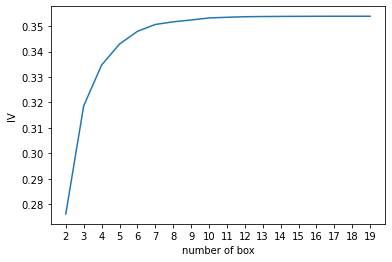

In [56]:
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

In [57]:
# 用最佳分箱个数分箱，验证分箱结果

def get_bin(my_num_bins, n):
    """
    my_num_bins: 待分箱
    n: 分箱个数 
    """
    while len(my_num_bins) > n:
        print(len(my_num_bins))
        pvs = []
        for i in range(len(my_num_bins) - 1):
            x1 = my_num_bins[i][2:]
            x2 = my_num_bins[i + 1][2:]
            pv = scipy.stats.chi2_contingency([x1, x2])[1]
            pvs.append(pv)
        
        i = pvs.index(max(pvs))
        my_num_bins[i: i+2] = [(my_num_bins[i][0]
                            ,my_num_bins[i][1]
                            ,my_num_bins[i][2] + my_num_bins[i + 1][2]
                            ,my_num_bins[i][3] + my_num_bins[i + 1][3]
                           )]
        
    return my_num_bins

In [58]:
aa = num_bins.copy()
aa

[(21.0, 28.0, 4243, 7536),
 (28.0, 31.0, 3571, 5963),
 (31.0, 34.0, 4075, 6750),
 (34.0, 36.0, 2908, 4586),
 (36.0, 39.0, 5182, 7476),
 (39.0, 41.0, 3956, 5824),
 (41.0, 43.0, 4002, 5687),
 (43.0, 45.0, 4389, 5968),
 (45.0, 46.0, 2419, 3277),
 (46.0, 48.0, 4813, 6160),
 (48.0, 50.0, 4900, 6225),
 (50.0, 52.0, 4728, 5823),
 (52.0, 54.0, 4681, 5011),
 (54.0, 56.0, 4677, 4038),
 (56.0, 58.0, 4483, 3396),
 (58.0, 61.0, 6583, 4804),
 (61.0, 64.0, 6968, 3210),
 (64.0, 68.0, 6623, 2271),
 (68.0, 74.0, 6753, 1917),
 (74.0, 107.0, 7737, 1395)]

In [59]:
afterbins = get_bin(aa, 4)

20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5


In [60]:
afterbins

[(21.0, 28.0, 53867, 76286),
 (54.0, 56.0, 15743, 12238),
 (61.0, 64.0, 20344, 7398),
 (74.0, 107.0, 7737, 1395)]

In [61]:
bins_df = get_woe(aa)

In [62]:
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,53867,76286,130153,0.667424,0.586126,0.551402,0.783892,-0.351807
1,54.0,56.0,15743,12238,27981,0.143486,0.437368,0.161151,0.125754,0.248014
2,61.0,64.0,20344,7398,27742,0.142261,0.266671,0.208248,0.076020,1.007741
3,74.0,107.0,7737,1395,9132,0.046829,0.152760,0.079199,0.014335,1.709284


In [63]:
# 选取最佳分箱的过程

def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
    自动最优分箱函数,基于卡方检验的分箱
    参数:
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    """
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(num_bins[0][0]
                              ,num_bins[1][1]
                              ,num_bins[0][2]+num_bins[1][2]
                              ,num_bins[0][3]+num_bins[1][3]
                              )]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0]
                                      ,num_bins[i][1]
                                      ,num_bins[i-1][2]+num_bins[i][2]
                                      ,num_bins[i-1][3]+num_bins[i][3]
                                      )]
                break
            else:
                break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []

    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins) -1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(num_bins[i][0]
                            ,num_bins[i+1][1]
                            ,num_bins[i][2]+num_bins[i+1][2]
                            ,num_bins[i][3]+num_bins[i+1][3]
                            )]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))

    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()

    return bins_df


In [64]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


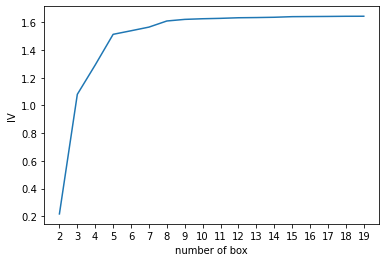

age


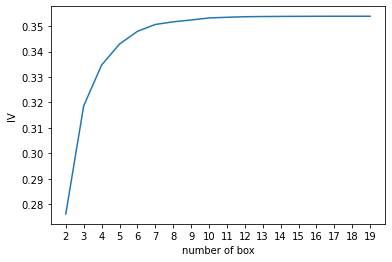

NumberOfTime30-59DaysPastDueNotWorse


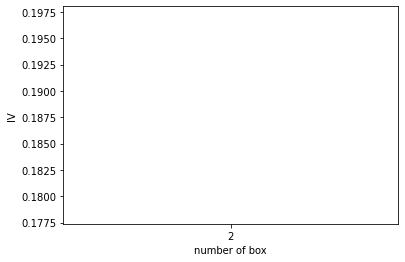

DebtRatio


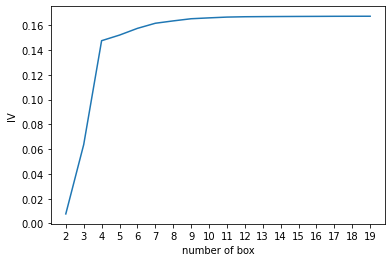

MonthlyIncome


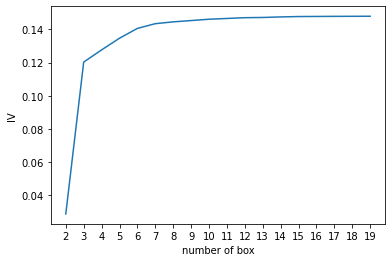

NumberOfOpenCreditLinesAndLoans


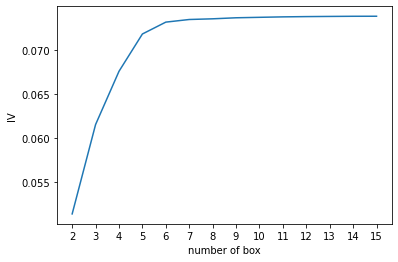

NumberOfTimes90DaysLate


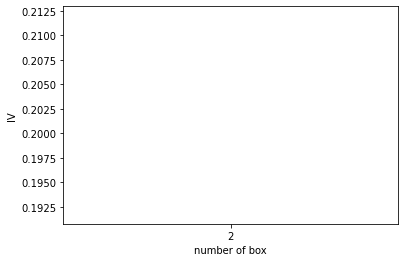

NumberRealEstateLoansOrLines


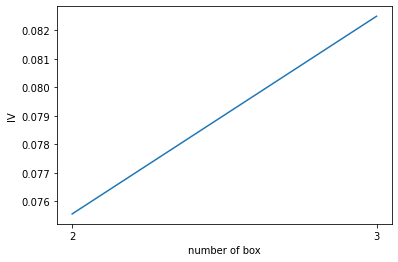

NumberOfTime60-89DaysPastDueNotWorse


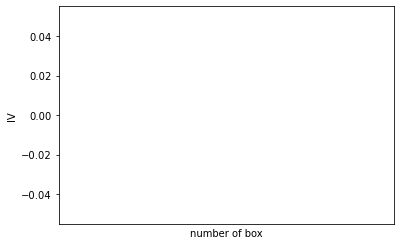

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [65]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data, i, "SeriousDlqin2yrs", n=2, q=20)

In [66]:
model_data["NumberOfDependents"]

0         0.000000
1         0.000000
2         3.716057
3         0.000000
4         0.181999
            ...   
195003    3.966830
195004    2.000000
195005    2.768793
195006    0.000000
195007    0.000000
Name: NumberOfDependents, Length: 195008, dtype: float64

In [67]:
# 不是所有特征都可以走这个分箱流程，因为有的特征无法分出20组
# 解法：将可以分箱的特征单独分组，不能自动分箱的自己观察后手写

auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6
                 ,"age":5
                 ,"DebtRatio":4
                 ,"MonthlyIncome":3
                 ,"NumberOfOpenCreditLinesAndLoans":5
                }

#不能使用自动分箱的变量

hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
             ,"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
             ,"NumberOfDependents":[0,1,2,3]
            }

#保证区间覆盖使用 np.inf替换最大值,用-np.inf替换最小值

hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [69]:
# 对所有特征按照选择的箱体个数和手写的分箱范围进行分箱
bins_of_col = {}

# 生成自动分箱的分箱区间和分箱后的 IV 值

for col in auto_col_bins:
    bins_df = graphforbestbin(model_data
                              ,col
                              ,"SeriousDlqin2yrs"
                              ,n=auto_col_bins[col]
                              ,q=20
                              ,graph=False
                             )
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    # 保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0], bins_list[-1] = -np.inf, np.inf
    bins_of_col[col] = bins_list
    
# 合并手动分箱数据
bins_of_col.update(hand_bins)

bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09896562775000001,
  0.29795157950623663,
  0.46539575630658647,
  0.982433609957634,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.0174052246, 0.4015874604009382, 1.468980734700383, inf],
 'MonthlyIncome': [-inf, 0.0918258701658992, 5588.527706034215, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [73]:
# 计算各个箱子的 WOE 并映射到数据中

data = model_data.copy()

# pd.cut 根据已知的分箱间隔把数据分箱
data = data[["age", "SeriousDlqin2yrs"]].copy()
data["cut"] = pd.cut(data["age"], [-np.inf, 36.0, 54.0, 61.0, 74.0, np.inf])
data

,age,SeriousDlqin2yrs,cut
0,53,0,"(36.0, 54.0]"
1,63,0,"(61.0, 74.0]"
2,39,1,"(36.0, 54.0]"
3,73,0,"(61.0, 74.0]"
4,53,1,"(36.0, 54.0]"
...,...,...,...
195003,32,1,"(-inf, 36.0]"
195004,50,1,"(36.0, 54.0]"
195005,46,1,"(36.0, 54.0]"
195006,64,0,"(61.0, 74.0]"


In [74]:
# 按照分箱结果取出其中的标签值
# 对每个箱中的 1 和 0 计数
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

cut           SeriousDlqin2yrs
(-inf, 36.0]  1                   24835
              0                   14797
(36.0, 54.0]  1                   51451
              0                   39070
(54.0, 61.0]  0                   15743
              1                   12238
(61.0, 74.0]  0                   20344
              1                    7398
(74.0, inf]   0                    7737
              1                    1395
Name: SeriousDlqin2yrs, dtype: int64

In [75]:
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",14797,24835
"(36.0, 54.0]",39070,51451
"(54.0, 61.0]",15743,12238
"(61.0, 74.0]",20344,7398
"(74.0, inf]",7737,1395


In [76]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

In [77]:
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

In [79]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14797,24835,-0.521665
"(36.0, 54.0]",39070,51451,-0.279111
"(54.0, 61.0]",15743,12238,0.248014
"(61.0, 74.0]",20344,7398,1.007741
"(74.0, inf]",7737,1395,1.709284


In [80]:
def get_woe(df, col, y, bins):
    df = df[[col, y]].copy()
    df["cut"] = pd.cut(df[col], bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

In [81]:
# 将所有 WOE 存储到字典中
woeall = {}

for col in bins_of_col:
    woeall[col] = get_woe(model_data, col, "SeriousDlqin2yrs", bins_of_col[col])
    
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.198230
 (0.099, 0.298]    0.671875
 (0.298, 0.465]   -0.126136
 (0.465, 0.982]   -1.074512
 (0.982, 1.0]     -0.471753
 (1.0, inf]       -2.040392
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.521665
 (36.0, 54.0]   -0.279111
 (54.0, 61.0]    0.248014
 (61.0, 74.0]    1.007741
 (74.0, inf]     1.709284
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0174]     1.509166
 (0.0174, 0.402]    0.036123
 (0.402, 1.469]    -0.388177
 (1.469, inf]       0.175920
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.0918]        1.260170
 (0.0918, 5588.528]   -0.228737
 (5588.528, inf]       0.232293
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.845814
 (1.0, 3.0]    -0.331984
 (3.0, 5.0]    -0.054617
 (5.0, 17.0]    0.124218
 (17.0, inf]    0.462551
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.351477
 (0.0, 1.0]    -0.871595
 (1.0, 2.0]    -1.374065
 (2.0, inf]    -1.540188
 dt

In [82]:
# 将所有 WOE 映射到原始数据
model_woe = pd.DataFrame(index=model_data.index)

In [83]:
model_woe["age"] = pd.cut(model_data["age"], bins_of_col["age"]).map(woeall["age"])

In [84]:
model_woe.head()

,age
0,-0.279111
1,1.007741
2,-0.279111
3,1.007741
4,-0.279111


In [85]:
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col], bins_of_col[col]).map(woeall[col])

In [86]:
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.279111,2.198230,0.036123,-0.228737,-0.054617,0.351477,0.237600,-0.394182,0.124957,0.623237
1,1.007741,0.671875,0.036123,-0.228737,-0.054617,0.351477,0.237600,-0.394182,0.124957,0.623237
2,-0.279111,-2.040392,-0.388177,-0.228737,-0.054617,-0.871595,-1.765493,-0.394182,-1.773746,-0.477150
3,1.007741,2.198230,-0.388177,-0.228737,0.124218,0.351477,0.237600,0.616878,0.124957,0.623237
4,-0.279111,-1.074512,-0.388177,0.232293,0.124218,0.351477,0.237600,0.616878,0.124957,-0.578310


In [87]:
# 将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

In [89]:
# 最终的建模数据(特征矩阵)
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.279111,2.198230,0.036123,-0.228737,-0.054617,0.351477,0.237600,-0.394182,0.124957,0.623237,0
1,1.007741,0.671875,0.036123,-0.228737,-0.054617,0.351477,0.237600,-0.394182,0.124957,0.623237,0
2,-0.279111,-2.040392,-0.388177,-0.228737,-0.054617,-0.871595,-1.765493,-0.394182,-1.773746,-0.477150,1
3,1.007741,2.198230,-0.388177,-0.228737,0.124218,0.351477,0.237600,0.616878,0.124957,0.623237,0
4,-0.279111,-1.074512,-0.388177,0.232293,0.124218,0.351477,0.237600,0.616878,0.124957,-0.578310,1


In [91]:
# 处理测试集

# 将已经计算好的 WOE 映射到测试集
test_woe = pd.DataFrame(index=test_data.index)

for col in bins_of_col:
    test_woe[col] = pd.cut(test_data[col], bins_of_col[col]).map(woeall[col])

test_woe["SeriousDlqin2yrs"] = test_data["SeriousDlqin2yrs"]

In [92]:
x = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
test_x = test_woe.iloc[:,:-1]
test_y = test_woe.iloc[:,-1]

In [93]:
from sklearn.linear_model import LogisticRegression as LR

lr = LR().fit(x, y)
lr.score(test_x, test_y)

0.7750789700392458

In [94]:
# 用 C 和 max_iter 调参

c_1 = np.linspace(0.01, 1, 20)
c_2 = np.linspace(0.01, 0.2, 20)

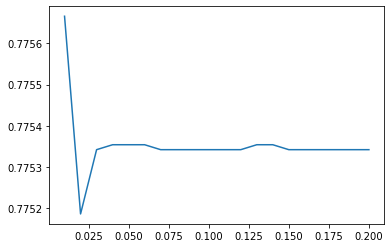

In [96]:
score = []
for i in c_2:
    lr = LR(solver="liblinear", C=i).fit(x, y)
    score.append(lr.score(test_x, test_y))
plt.figure()
plt.plot(c_2, score)
plt.show()

In [97]:
lr.n_iter_

array([5], dtype=int32)

/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: Conver

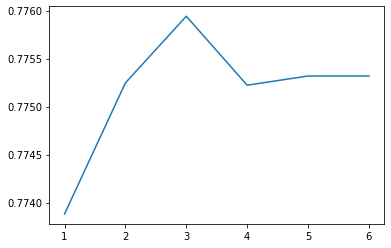

In [100]:
score = []
for i in [1,2,3,4,5,6]:
    lr = LR(solver='liblinear', C=0.025, max_iter=i).fit(x,y)
    score.append(lr.score(test_x, test_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

In [102]:
# ROC 曲线
# pip install scikit-plot
import scikitplot as skplt

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

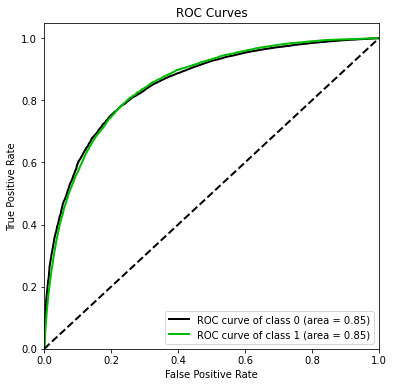

In [105]:
test_proba_df = pd.DataFrame(lr.predict_proba(test_x))
skplt.metrics.plot_roc(test_y, test_proba_df
                       ,plot_micro=False
                       ,figsize=(6,6)
                       ,plot_macro=False
                      )

In [106]:
# 制作评分卡
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.198230
 (0.099, 0.298]    0.671875
 (0.298, 0.465]   -0.126136
 (0.465, 0.982]   -1.074512
 (0.982, 1.0]     -0.471753
 (1.0, inf]       -2.040392
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.521665
 (36.0, 54.0]   -0.279111
 (54.0, 61.0]    0.248014
 (61.0, 74.0]    1.007741
 (74.0, inf]     1.709284
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0174]     1.509166
 (0.0174, 0.402]    0.036123
 (0.402, 1.469]    -0.388177
 (1.469, inf]       0.175920
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.0918]        1.260170
 (0.0918, 5588.528]   -0.228737
 (5588.528, inf]       0.232293
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.845814
 (1.0, 3.0]    -0.331984
 (3.0, 5.0]    -0.054617
 (5.0, 17.0]    0.124218
 (17.0, inf]    0.462551
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.351477
 (0.0, 1.0]    -0.871595
 (1.0, 2.0]    -1.374065
 (2.0, inf]    -1.540188
 dt

In [108]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
B, A

(28.85390081777927, 481.8621880878296)

In [109]:
base_score = A - B * lr.intercept_
base_score

array([482.01937117])

In [110]:
lr.intercept_

array([-0.00544755])

In [111]:
score_age = woeall["age"] * (-B*lr.coef_[0][0])
score_age

cut
(-inf, 36.0]    -4.123854
(36.0, 54.0]    -2.206419
(54.0, 61.0]     1.960595
(61.0, 74.0]     7.966363
(74.0, inf]     13.512184
dtype: float64

In [112]:
file = "ScoreData.csv"

In [113]:
with open(file, "w") as f:
    f.write("base_score,{}\n".format(base_score))
for i, col in enumerate(x.columns):
    score = woeall[col] * (-B * lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file, header=True, mode="a")